L'application du Q-learning au RoShamBo:
1. Comment équilibrer l'exploration et l'exploitation?
2. Est-ce que vous pouvez suggérer un modification au méthode de Q-learning?
3. Si vous avez bien compris cet exercice, essayez d'appliquer l'algorithme de Q-learning à des problèmes un peu plus complexe comme le tic-tac-toe.
Les outils principales:

In [0]:
import numpy as np
import matplotlib.pyplot as plt

class Q_agent:
    
    def __init__(self,epochs,epsilon,learning_rate,discount_factor):
        self.epochs = epochs
        self.epsilon = epsilon
        self.alpha = learning_rate
        self.gamma = discount_factor
        self.Q = np.zeros(3)
        
        ### ces listes vont nous permettre de suivre l'évolution des estimations:
        self.Q1 = []
        self.Q2 = []
        self.Q3 = []
        
    def Q_learning(self):

        for i in range(self.epochs):
            
            ## use the epsilon-greedy strategy only if epsilon is non-zero:    
            if epsilon != 0.0:
                P = np.random.rand() > self.epsilon/np.log(np.e+i)
                choice = int(np.argmax(self.Q)*(P) + np.random.choice(3)*(1.0-P))
                
            else:
                choice = np.random.choice(3)
            
            ## on considère que notre l'adversaire a un comportement imprévisible
            ## ce qui raisonnable pour ce genre de jeux
            reward = np.random.choice((0,-1,1),1)[0]
            
            self.Q[choice] = (1-self.alpha)*self.Q[choice]+ \
                            self.alpha*(reward + self.gamma*max(self.Q))
            
            if choice == 0.0:
                self.Q1.append(self.Q[choice])
            
            elif choice == 1.0:
                self.Q2.append(self.Q[choice])
                
            else:
                self.Q3.append(self.Q[choice])

1. Est-ce que la solution 'epsilon-greedy' mène à une estimation convergente?
a. Jouez avec les paramètres et essaye de voir si cela fais une différence.
b. Qu'est-ce que vos observations vous suggère?

In [0]:
epochs = 1000
epsilon = 0.5
learning_rate = 0.1
discount_factor = 0.9

Q = Q_agent(epochs,epsilon,learning_rate,discount_factor)

Q.Q_learning()

In [4]:
Q.Q ## le résultat finale

array([-0.66526841, -0.02084388, -0.78746122])

In [0]:
%matplotlib inline

plt.style.use('ggplot')

plt.figure(figsize=(10,10)) 

X = np.arange(len(Q.Q1))
plt.plot(X,Q.Q1,color='steelblue')

plt.title('Q1 value convergence?')
plt.xlabel('iteration')
plt.ylabel('Q1 value')

plt.show()

Ici on ne considère que le première suite mais il n'y a aucune raison que les autres auront un comportement different. D'autre part, on peut examiner les histogrammes pour mieux apprecier la concentration des valeurs car convergence implique concentration.

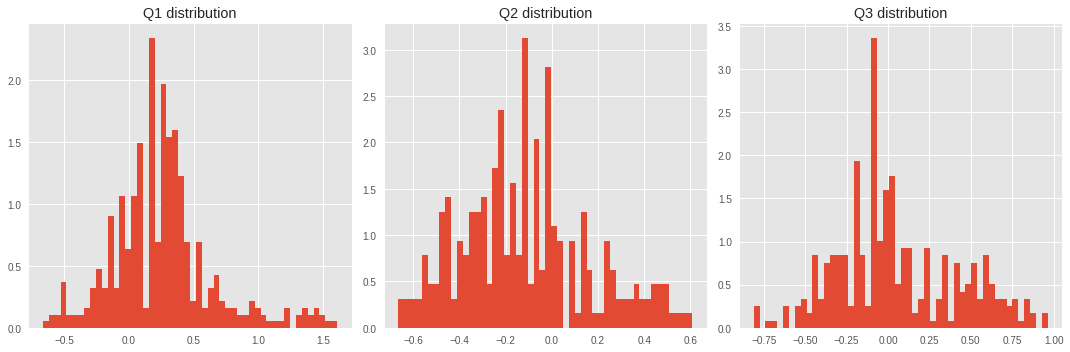

In [5]:
np.random.seed(0)

n_bins = 50
x = np.random.randn(1000, 3)

%matplotlib inline

plt.style.use('ggplot')

plt.figure(figsize=(10,10)) 

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,5))
ax0, ax1, ax2 = axes.flatten()

ax0.set_title('Q1 distribution')
ax0.hist(Q.Q1, n_bins, normed=1, histtype='bar')

ax1.set_title('Q2 distribution')
ax1.hist(Q.Q2, n_bins, normed=1, histtype='bar')

ax2.set_title('Q3 distribution')
ax2.hist(Q.Q3, n_bins, normed=1, histtype='bar')

fig.tight_layout()
plt.show()

2. Qu'est-ce qu'on observe sans la stratégie 'epsilon-greedy'(i.e. epsilon = 0.0)?
a. Jouez avec les paramètres et essaye de voir si cela fais une différence.
b. Qu'est-ce que vos observations vous suggère?

In [0]:
epochs = 1000
epsilon = 0.0
learning_rate = 0.01
discount_factor = 0.5

Q = Q_agent(epochs,epsilon,learning_rate,discount_factor)

Q.Q_learning()

In [7]:
Q.Q ## le résultat finale

array([-0.07314928,  0.04058836, -0.04303905])

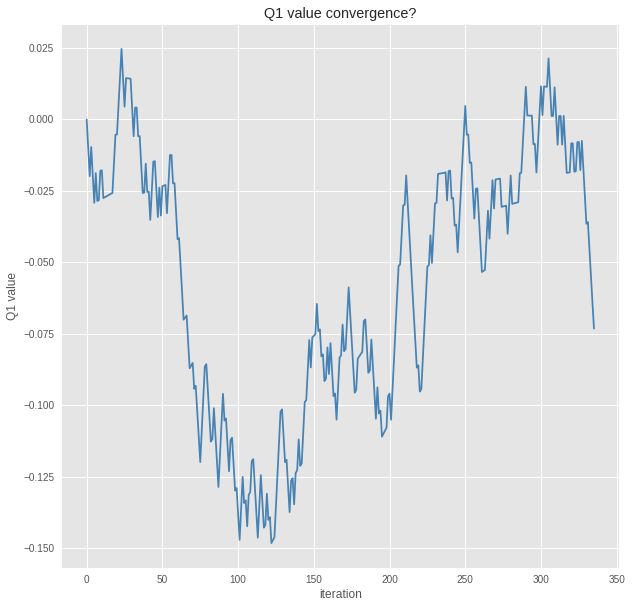

In [8]:
%matplotlib inline

plt.style.use('ggplot')

plt.figure(figsize=(10,10)) 

X = np.arange(len(Q.Q1))
plt.plot(X,Q.Q1,color='steelblue')

plt.title('Q1 value convergence?')
plt.xlabel('iteration')
plt.ylabel('Q1 value')

plt.show()

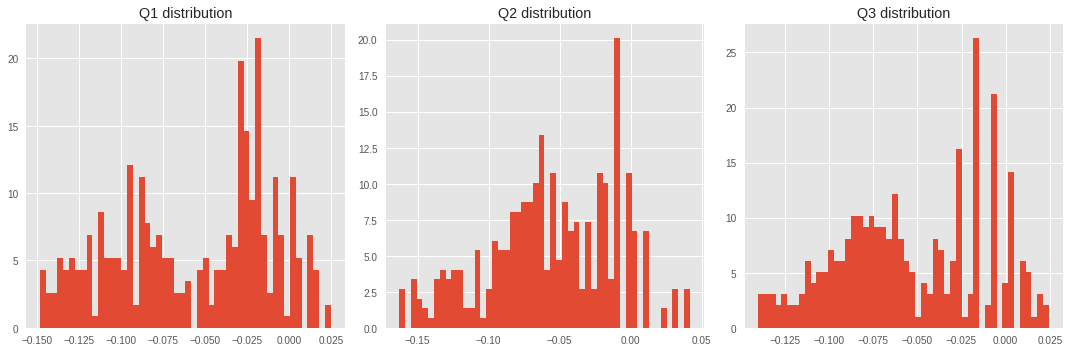

In [9]:
np.random.seed(0)

n_bins = 50
x = np.random.randn(1000, 3)

%matplotlib inline

plt.style.use('ggplot')

plt.figure(figsize=(10,10)) 

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,5))
ax0, ax1, ax2 = axes.flatten()

ax0.set_title('Q1 distribution')
ax0.hist(Q.Q1, n_bins, normed=1, histtype='bar')

ax1.set_title('Q2 distribution')
ax1.hist(Q.Q2, n_bins, normed=1, histtype='bar')

ax2.set_title('Q3 distribution')
ax2.hist(Q.Q3, n_bins, normed=1, histtype='bar')

fig.tight_layout()
plt.show()